In [1]:
import torch
import torch.nn as nn


In [2]:
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        return self.linear(x)


In [3]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        
        # Convolution 1
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        
        # Max pool 1
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
        
        # Convolution 2
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        
        # Max pool 2
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        
        # Fully connected 1 (readout)
        self.fc1 = nn.Linear(64 * 8 * 8, 10) 
    
    def forward(self, x):
        # Convolution 1
        out = self.conv1(x)
        out = self.relu1(out)
        
        # Max pool 1
        out = self.maxpool1(out)
        
        # Convolution 2 
        out = self.conv2(out)
        out = self.relu2(out)
        
        # Max pool 2 
        out = self.maxpool2(out)
        
        # flatten
        out = out.view(out.size(0), -1)

        # Dense (readout) layer
        out = self.fc1(out)
        return out


In [ ]:
class SimpleRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleRNN, self).__init__()

        self.hidden_size = hidden_size

        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        self.relu = nn.ReLU()

    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), 1)
        hidden = self.i2h(combined)
        output = self.i2o(combined)
        output = self.relu(output)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

In [ ]:
# Assume we're working with CIFAR10, which has 10 classes
model = SimpleCNN()

# Define the loss function and the optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

# Assume we have training_data_loader that loads the CIFAR10 data
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(training_data_loader):
        # Forward pass: compute the output class given a image
        outputs = model(images)
        
        # Compute the loss
        loss = criterion(outputs, labels)
        
        # Backward pass: compute the gradients of the loss w.r.t. the model's parameters
        loss.backward()
        
        # Update the parameters
        optimizer.step()
        
        # Zero the gradients to prepare for the next pass
        optimizer.zero_grad()

    # Print loss for this epoch
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}')


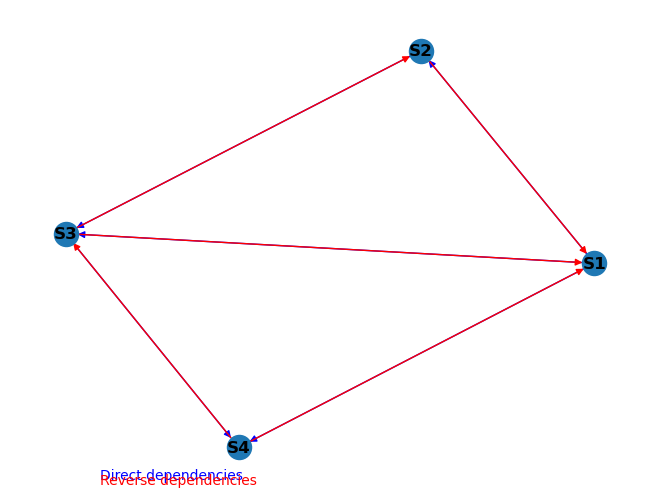

In [3]:
import matplotlib.pyplot as plt
import networkx as nx

# Define the graph
G = nx.DiGraph()

# Define the nodes and edges based on the dependencies
nodes = ['S1', 'S2', 'S3', 'S4']
direct_dependencies = [('S1', 'S2'),  # S2 depends on S1
                       ('S1', 'S3'), ('S2', 'S3'),  # S3 depends on S1 and S2
                       ('S1', 'S4'), ('S3', 'S4')]  # S4 depends on S1 and S3
reverse_dependencies = [('S2', 'S1'),  # S1 reverse depends on S2
                        ('S3', 'S1'), ('S3', 'S2'),  # S1 and S2 reverse depend on S3
                        ('S4', 'S1'), ('S4', 'S3')]  # S1 and S3 reverse depend on S4

# Add nodes and edges to the graph
G.add_nodes_from(nodes)
G.add_edges_from(direct_dependencies, color='blue')
G.add_edges_from(reverse_dependencies, color='red')

# Draw the graph with labels and custom colors
pos = nx.spring_layout(G)
edges = G.edges()
colors = [G[u][v]['color'] for u, v in edges]
nx.draw(G, pos, edge_color=colors, with_labels=True, font_weight='bold')

# Add legend
plt.figtext(0.14, 0.02, "Direct dependencies", color="blue")
plt.figtext(0.14, 0.01, "Reverse dependencies", color="red")

# Show the plot
plt.show()
